# Dataset Description
### Columns : 
1. Id
2. ProductId
3. UserId
4. ProfineName
5. HelpfulnessNumerator
6. HelpfulnessDenominator
7. Score
8. Time
9. Summary
10. Text

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
original_row = df.shape
original_row

(568454, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
# unique users and products
df.UserId.unique().shape[0], df.ProductId.unique().shape[0]

(256059, 74258)

In [6]:
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [7]:
# checking for any null entry
for col in df.columns:
    print("No null entry for col {} is {}".format(col, df[df[col].isnull() == True].shape[0] == 0))

No null entry for col Id is True
No null entry for col ProductId is True
No null entry for col UserId is True
No null entry for col ProfileName is False
No null entry for col HelpfulnessNumerator is True
No null entry for col HelpfulnessDenominator is True
No null entry for col Score is True
No null entry for col Time is True
No null entry for col Summary is False
No null entry for col Text is True


**ProfileName and Summary column has null entry**
1. ProfileName is not required for sentiment classification
2. We will remove the null entries row for Summary

In [8]:
'''27 null summary entries'''
df[df['Summary'].isnull()].shape[0]

27

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Data Cleaning

In [11]:
'''removing confilcting review score and null summary entries'''
df = df[df['Score'] != 3]
df = df[df['Summary'].isnull() == False]

In [12]:
'''Converting <3 score to negative else positive'''
df['Score'] = df['Score'].map(lambda x : 'positive' if x > 3 else 'negative')

In [13]:
df.shape

(525789, 10)

In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [15]:
''' 
    1. Duplicate entries in the table
    2. Like same person at same time reviewed different products. How?
    3. Remove such entries. 
'''
df[df['UserId'] == 'AR5J8UI46CURR']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
73790,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
78444,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
138276,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
138316,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
155048,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [16]:
'''Sorting data according to ProductId in ascending order'''
sorted_data = df.sort_values(['UserId', 'Time'], axis=0, ascending=True, inplace=False, kind='mergesort', na_position='last')

In [17]:
'''Deduplication of entries groupby User, profile name, time and review'''
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(364172, 10)

In [18]:
final[final['UserId'] == 'AR5J8UI46CURR']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
73790,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,positive,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [19]:
final[final['HelpfulnessNumerator'] > final['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,positive,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,positive,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


<b>Observation:-</b> Two rows given above have value of HelpfulnessNumerator is greater than HelpfulnessDenominator which is not practically possible hence these two rows too are removed from calcualtions

In [20]:
final = final[final['HelpfulnessNumerator'] <= final['HelpfulnessDenominator']]

In [21]:
'''Checking to see how much % of data still remains'''
(final['Id'].size*1.0)/(original_row[0]*1.0)*100

64.06323114975002

In [22]:
final['Score'].value_counts()

positive    307061
negative     57109
Name: Score, dtype: int64

### Text Preprocessing:

In [23]:
'''observe the data for cleaning text'''
c = 1
for i, row in final.iterrows():
    if(c < 10):
        print(row['Text'])
    else:
        break
    c += 1

I have to say I was a little apprehensive to buy this product for the price, but I like to keep my K-Cup price under $0.50 and Sam's Club was sold out at the time, and I tried this.  The Fuhgeddaboudit is very strong, but that's how I like it.  Overall, I was impressed.
Received my free K cups as a sample promotion and LOVE them. I have at least one a day at work!!!!
Brooklyn Bean Roastery Blend K-Cups are great tasting coffee. I like the Breakfast blend flavor the best, it is light tasting and it surprised me how fast it wakes you up. The dark roasts Fudgeddaboutit and Cyclone have a stronger rich flavor. I think the donut shop and maple flavor is sweet flavored and light which is good in coffee. The Brooklyn Bridge is a good well balanced coffee. I think the Breakfast Blend flavor is the best flavor and it wakes you up quickly.
Brooklyn "French Roast" K-Cup Coffee is not one of my favorites. It's not awful.  It's okay if you're in a "pinch" and it's the only pod you have.  I ended up

1. Begin by removing the html tags
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of english letters and is not alpha-numeric
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
5. Convert the word to lowercase
6. Remove Stopwords
7. Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)<br>

After which we collect the words used to describe positive and negative reviews

In [24]:
import re
import string
import nltk
# nltk.download("stopwords")
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
from nltk.corpus import stopwords

# Finding stop words
stop_words = set(stopwords.words('english'))

In [25]:
def preprocess_document(doc):
    # negative sense should not be eleminated + some short representation
    CONTRACTIONS = {"didn't":"did not", "mayn't":"may not", "can't":"can not", "won't":"will not", "isn't":"is not", "amn't":"am not",\
                  "aren't":"are not", "wasn't":"was not", "weren't":"were not", "couldn't":"could not", \
                  "wouldn't":"would not", "don't":"do not", "doesn't":"does not",\
                  "i'll":"i will", "you'll":"you will", "they'll":"they will",\
                  "may've":"may have", "can've":"can have", "will've":"will have", "you've":"you have", \
                  "could've":"could have", "would've":"would have", "you've":"you have", "they":"they have",\
                  "i've":"i have", "you've":"you have", "we've":"we have", "there's":"there is", "i'm":"i am",\
                  "it's":"it is", "what's":"what is", "where's":"where is", "how's":"how is", "i'd":"i had"}
    punctuation = string.punctuation + "\n\n"
    punc_replace = ''.join([' ' for s in punctuation]) # required for replacing punctuation with null ('')
    doc_clean = doc.replace('-', ' ') # replace - with null str
    doc_clean = (doc_clean.encode('ascii', 'ignore')).decode("utf-8")
    doc_clean = doc_clean.replace('<br />', '') # replace <br /> with ''
    doc_clean = doc_clean.replace("’", "'") # replace <br /> with null str
    doc_clean = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in doc_clean.split(' ')] # replacing some common short forms
    doc_clean = " ".join(doc_clean) # list to sentence of strings
    doc_clean = re.sub(r'\W +', ' ', doc_clean) # except [a-zA-Z0-9_]
    doc_clean = re.sub(r'\d+', ' ', doc_clean) # remove numbers [0-9]
    trans_table = str.maketrans(punctuation, punc_replace); # replace punctuations with ' '
    doc_clean = ' '.join([word.translate(trans_table) for word in doc_clean.split(' ')])
    doc_clean = doc_clean.split(' ')
    doc_clean = [word for word in doc_clean if len(word) > 1]
    # removing the stopwords from a sentence
    doc_clean = [word for word in doc_clean if not word.lower() in stop_words or word.lower() == 'not' or word.lower() == 'no']
    return ' '.join(word for word in doc_clean)
#     lemmatizedWords = []
#     lemmatizer = nltk.WordNetLemmatizer()
#     for words, tags in nltk.tag.pos_tag(doc_clean):
#         if(tags.startswith('JJ')):
#             lemmatizedWords.append(lemmatizer.lemmatize(words, pos='a'))
#         elif(tags.startswith('VB')):
#             lemmatizedWords.append(lemmatizer.lemmatize(words, pos='v'))
#         elif(tags.startswith('RB')):
#             lemmatizedWords.append(lemmatizer.lemmatize(words, pos='r'))
#         elif(tags.startswith('NN')):
#             lemmatizedWords.append(lemmatizer.lemmatize(words, pos='n'))
#         else:
#             lemmatizedWords.append(lemmatizer.lemmatize(words))
    
#     return lemmatizedWords

In [26]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
136322,136323,B006Q820X0,#oc-R103C0QSV1DF5E,C,1,2,positive,1343088000,Great for the Price,I have to say I was a little apprehensive to b...
516061,516062,B008I1XPKA,#oc-R109MU5OBBZ59U,AayGee,0,1,positive,1350086400,AWESOME Coffee!!!!,Received my free K cups as a sample promotion ...
516078,516079,B008I1XPKA,#oc-R10LFEMQEW6QGZ,Julie,0,1,positive,1345939200,Brooklyn Bean Roastery Breakfast Blend K-Cups,Brooklyn Bean Roastery Blend K-Cups are great ...
136544,136545,B006Q820X0,#oc-R10UA029WVWIUI,Kim D,0,0,negative,1342483200,Less than satisfactory. I gave the Brooklyn K...,"Brooklyn ""French Roast"" K-Cup Coffee is not on..."
83317,83318,B005ZBZLT4,#oc-R115TNMSPFT9I7,Breyton,2,3,negative,1331510400,"""Green"" K-cup packaging sacrifices flavor",Overall its just OK when considering the price...


In [27]:
text = final['Text'].astype(str).tolist()
text[:5]

["I have to say I was a little apprehensive to buy this product for the price, but I like to keep my K-Cup price under $0.50 and Sam's Club was sold out at the time, and I tried this.  The Fuhgeddaboudit is very strong, but that's how I like it.  Overall, I was impressed.",
 'Received my free K cups as a sample promotion and LOVE them. I have at least one a day at work!!!!',
 'Brooklyn Bean Roastery Blend K-Cups are great tasting coffee. I like the Breakfast blend flavor the best, it is light tasting and it surprised me how fast it wakes you up. The dark roasts Fudgeddaboutit and Cyclone have a stronger rich flavor. I think the donut shop and maple flavor is sweet flavored and light which is good in coffee. The Brooklyn Bridge is a good well balanced coffee. I think the Breakfast Blend flavor is the best flavor and it wakes you up quickly.',
 'Brooklyn "French Roast" K-Cup Coffee is not one of my favorites. It\'s not awful.  It\'s okay if you\'re in a "pinch" and it\'s the only pod you

In [28]:
import time
tic = time.time()
cleaned_text = [preprocess_document(review.lower()) for review in text]
toc = time.time()
print(str(toc-tic) + ' sec.')

103.58044171333313 sec.


In [29]:
text[:5]

["I have to say I was a little apprehensive to buy this product for the price, but I like to keep my K-Cup price under $0.50 and Sam's Club was sold out at the time, and I tried this.  The Fuhgeddaboudit is very strong, but that's how I like it.  Overall, I was impressed.",
 'Received my free K cups as a sample promotion and LOVE them. I have at least one a day at work!!!!',
 'Brooklyn Bean Roastery Blend K-Cups are great tasting coffee. I like the Breakfast blend flavor the best, it is light tasting and it surprised me how fast it wakes you up. The dark roasts Fudgeddaboutit and Cyclone have a stronger rich flavor. I think the donut shop and maple flavor is sweet flavored and light which is good in coffee. The Brooklyn Bridge is a good well balanced coffee. I think the Breakfast Blend flavor is the best flavor and it wakes you up quickly.',
 'Brooklyn "French Roast" K-Cup Coffee is not one of my favorites. It\'s not awful.  It\'s okay if you\'re in a "pinch" and it\'s the only pod you

In [30]:
'''did not lemmatised, taking too much time, if u want uncomment it in preprocessing'''
final['cleaned_text'] = cleaned_text

In [36]:
# final[final['cleaned_text'].isnull() == True]
final[final.UserId =='A2ZE58VIDDCMR7']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
233938,233939,B003E6COMO,A2ZE58VIDDCMR7,inna,1,2,positive,1350000000,&#1091;&#1076;&#1086;&#1073;&#1085;&#1072;&#11...,&#1056;&#1077;&#1096;&#1080;&#1083;&#1072; &#1...,


In [33]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
136322,136323,B006Q820X0,#oc-R103C0QSV1DF5E,C,1,2,positive,1343088000,Great for the Price,I have to say I was a little apprehensive to b...,say little apprehensive buy product price like...
516061,516062,B008I1XPKA,#oc-R109MU5OBBZ59U,AayGee,0,1,positive,1350086400,AWESOME Coffee!!!!,Received my free K cups as a sample promotion ...,received free cups sample promotion love least...
516078,516079,B008I1XPKA,#oc-R10LFEMQEW6QGZ,Julie,0,1,positive,1345939200,Brooklyn Bean Roastery Breakfast Blend K-Cups,Brooklyn Bean Roastery Blend K-Cups are great ...,brooklyn bean roastery blend cups great tastin...
136544,136545,B006Q820X0,#oc-R10UA029WVWIUI,Kim D,0,0,negative,1342483200,Less than satisfactory. I gave the Brooklyn K...,"Brooklyn ""French Roast"" K-Cup Coffee is not on...",brooklyn french roast cup coffee not one favor...
83317,83318,B005ZBZLT4,#oc-R115TNMSPFT9I7,Breyton,2,3,negative,1331510400,"""Green"" K-cup packaging sacrifices flavor",Overall its just OK when considering the price...,overall ok considering price cups sf coffee cu...


In [34]:
final.to_csv('cleaned_reviews.csv', index=False)

## Design Algorithm for sentiment classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
reviews = pd.read_csv('cleaned_reviews.csv')

In [78]:
reviews.shape

(364170, 11)

In [87]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
0,136323,B006Q820X0,#oc-R103C0QSV1DF5E,C,1,2,positive,1343088000,Great for the Price,I have to say I was a little apprehensive to b...,say little apprehensive buy product price like...
1,516062,B008I1XPKA,#oc-R109MU5OBBZ59U,AayGee,0,1,positive,1350086400,AWESOME Coffee!!!!,Received my free K cups as a sample promotion ...,received free cups sample promotion love least...
2,516079,B008I1XPKA,#oc-R10LFEMQEW6QGZ,Julie,0,1,positive,1345939200,Brooklyn Bean Roastery Breakfast Blend K-Cups,Brooklyn Bean Roastery Blend K-Cups are great ...,brooklyn bean roastery blend cups great tastin...
3,136545,B006Q820X0,#oc-R10UA029WVWIUI,Kim D,0,0,negative,1342483200,Less than satisfactory. I gave the Brooklyn K...,"Brooklyn ""French Roast"" K-Cup Coffee is not on...",brooklyn french roast cup coffee not one favor...
4,83318,B005ZBZLT4,#oc-R115TNMSPFT9I7,Breyton,2,3,negative,1331510400,"""Green"" K-cup packaging sacrifices flavor",Overall its just OK when considering the price...,overall ok considering price cups sf coffee cu...


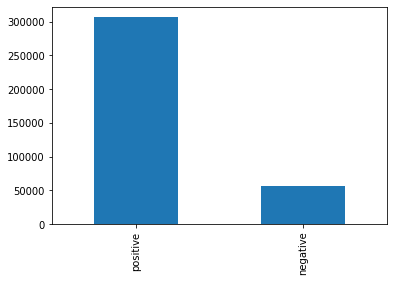

In [80]:
reviews['Score'].value_counts().plot(kind='bar')
plt.show()

In [81]:
# Using Google News Word2Vectors
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

## with pretrained Word2Vector

In [82]:
# model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [83]:
# model.word_vec('computer')

In [84]:
# model.similarity('woman', 'man')

## Train your own Word2Vec model using your own text corpus

In [85]:
import gensim
i=0
list_of_sent=[]
y = []
for sent, polarity in reviews[['cleaned_text', 'Score']].values:
    if(isinstance(sent, float)):
        continue
    list_of_sent.append(sent.split())
    if(polarity == 'positive'):
        y.append(1)
    else:
        y.append(0)

In [88]:
len(list_of_sent), len(y)

(364167, 364167)

In [89]:
print(reviews['Text'].values[0])
print("*"*125)
print(reviews['cleaned_text'].values[0])
print("*"*125)
print(list_of_sent[0])

I have to say I was a little apprehensive to buy this product for the price, but I like to keep my K-Cup price under $0.50 and Sam's Club was sold out at the time, and I tried this.  The Fuhgeddaboudit is very strong, but that's how I like it.  Overall, I was impressed.
*****************************************************************************************************************************
say little apprehensive buy product price like keep cup price sam club sold time tried fuhgeddaboudit strong like overall impressed
*****************************************************************************************************************************
['say', 'little', 'apprehensive', 'buy', 'product', 'price', 'like', 'keep', 'cup', 'price', 'sam', 'club', 'sold', 'time', 'tried', 'fuhgeddaboudit', 'strong', 'like', 'overall', 'impressed']


In [90]:
w2v_model = gensim.models.Word2Vec(list_of_sent, min_count = 5, size = 50, workers = 20)

In [91]:
vocab = list(w2v_model.wv.vocab)
print(len(vocab))
vocab[0], vocab[-1]

34278


('say', 'puk')

In [92]:
w2v_model.wv.similarity('woman', 'man')

0.65446174

In [93]:
w2v_model.wv.most_similar('hotel')

[('hotels', 0.7870159149169922),
 ('motel', 0.778052031993866),
 ('vacation', 0.7668137550354004),
 ('ireland', 0.7577199339866638),
 ('paris', 0.719463586807251),
 ('london', 0.7155829071998596),
 ('conference', 0.7146056890487671),
 ('rome', 0.7072338461875916),
 ('rooms', 0.7022071480751038),
 ('breakroom', 0.6999342441558838)]

In [94]:
w2v_model.wv['hotel']

array([-1.5890012 ,  1.2631526 , -0.1266999 , -0.29994875,  0.3377623 ,
        0.27593616, -1.8732355 , -1.5036888 , -1.926679  , -1.3508315 ,
        1.2082211 , -0.33695588,  0.5997601 ,  1.1409487 , -1.016618  ,
        1.2887279 ,  0.886338  ,  2.6007133 ,  0.9540207 , -0.03547563,
        1.4907396 ,  0.4770902 ,  0.9251322 , -0.65900975, -0.42440236,
       -1.3377224 , -1.9974976 , -0.28572747,  0.11069635,  0.5555362 ,
       -1.8846067 ,  0.55977094,  2.0914152 ,  1.3883376 , -0.16358633,
       -3.057779  ,  0.16705501, -2.7011654 ,  1.8126731 ,  0.8179987 ,
       -1.225041  , -1.6454949 ,  3.776888  , -0.9606517 ,  0.7377807 ,
        2.0618114 ,  2.582558  ,  1.7848674 , -0.19659062,  1.8183081 ],
      dtype=float32)

# Building knn model for sentiment classification

In [95]:
x = [] 
for sent in list_of_sent: 
    sent_vec = np.zeros(50) # initialise with 0 of dim(1 x 50)
    cnt_words = 0
    for word in sent:
        try:
            vec = w2v_model.wv[word] # returns ndarray
            sent_vec += vec # add all vectors to get a accumulated vector
            cnt_words += 1 # count total words for normalization
        except:
            pass
    sent_vec /= cnt_words
    x.append(sent_vec)

In [96]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [98]:
## cross_validation(depricated) ==> model_selection
from sklearn.model_selection import cross_val_score

def find_optimal_k(X_train,y_train, myList=range(0, 40)):
    #creating odd list of K for KNN
    neighbors = list(filter(lambda x: x % 2 != 0, myList))

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print('\nThe optimal number of neighbors is %d.' % optimal_k)


    plt.figure(figsize=(10,6))
    plt.plot(neighbour, cv_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
    plt.plot(neighbour, MSE, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    
    return optimal_k

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
len(x_train), len(y_train), len(x_test), len(y_test)

(291333, 291333, 72834, 72834)

In [100]:
# best_k = find_optimal_k(x_train, y_train, range(0, 40)) # takes too much time
best_k = 3 # (say)

In [101]:
knn = KNeighborsClassifier(n_neighbors = best_k, n_jobs = -1)

In [102]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [103]:
pred = knn.predict(x_test)

In [119]:
print(knn.predict_proba(x_test[0:10]))

[[0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]]


In [104]:
import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve

In [105]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.8780789191860944
[[ 5537  6052]
 [ 2828 58417]]


In [106]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.48      0.55     11589
           1       0.91      0.95      0.93     61245

    accuracy                           0.88     72834
   macro avg       0.78      0.72      0.74     72834
weighted avg       0.87      0.88      0.87     72834



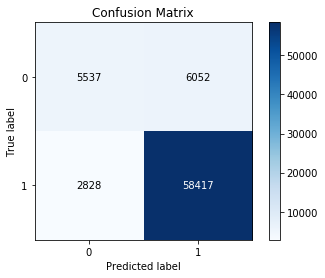

In [107]:
skplt.plot_confusion_matrix(y_test, pred)
plt.show()

AUC :  0.7158027280465842


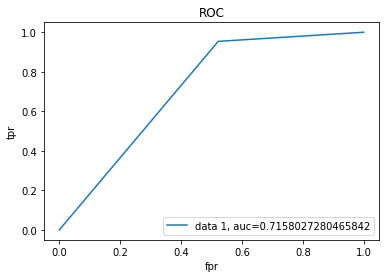

In [116]:
from sklearn import metrics
print("AUC : ", metrics.roc_auc_score(y_test, pred))
fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

**Observation**
1. Finding best-k takes too much time, so taken random initialisation
2. The current accuracy on pretrained embedding is ~87.80%.
3. Knn is very slow algorithm.
4. Dataset was not balanced (p:~3,00,000, n:~50,000)